In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib
%matplotlib inline

Using TensorFlow backend.


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model
import sys

In [3]:
sys.path.append('../odcd/cd/')

In [4]:
df = pd.read_csv('/home/Gigio/git/fork-odcd/data/musk/musk_csv.csv')

In [5]:
print(df.shape)
df.head()

(6598, 170)


,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [6]:
df['class'].value_counts() / len(df)

0    0.845862
1    0.154138
Name: class, dtype: float64

In [7]:
features = [col for col in df.columns if col not in ['ID', 'molecule_name', 'conformation_name', 'class']]
target = 'class'

In [8]:
X, y = df[features], df[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
scale = True
if scale:
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

In [11]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4948, 166) (1650, 166)
(4948,) (1650,)


# Logistic

In [12]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
preds_train, preds_test = lg.predict(X_train), lg.predict(X_test)

In [14]:
confusion_matrix(y_train, preds_train)

array([[4153,   50],
       [ 228,  517]])

In [15]:
confusion_matrix(y_test, preds_test)

array([[1364,   14],
       [ 104,  168]])

In [16]:
accuracy_score(y_test, preds_test)

0.9284848484848485

In [17]:
accuracy_score(y_train, preds_train)

0.9438156831042845

# xg and features importance

In [18]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [19]:
accuracy_score(y_test, xgb.predict(X_test))

/home/Gigio/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9593939393939394

In [20]:
imp = xgb.get_booster().get_score(importance_type='total_gain')

In [21]:
import operator
sorted_imp = sorted(imp.items(), key=operator.itemgetter(1), reverse=True)

In [22]:
sorted_imp

[('f35', 2224.62928507),
 ('f162', 1145.3426617219998),
 ('f150', 743.4334148),
 ('f125', 646.1192959899998),
 ('f32', 624.024559),
 ('f34', 574.08435017),
 ('f0', 552.48320975),
 ('f143', 509.70789993999995),
 ('f131', 464.6733375400001),
 ('f30', 404.2724239),
 ('f25', 387.7411119),
 ('f8', 374.0523794),
 ('f65', 370.79228581000007),
 ('f123', 346.4749799),
 ('f54', 314.20001503000003),
 ('f147', 291.14564702),
 ('f110', 274.3989983),
 ('f164', 260.7294545),
 ('f161', 243.0297241),
 ('f121', 238.50909803000002),
 ('f62', 230.30442804999998),
 ('f57', 180.5783386),
 ('f82', 161.20383745),
 ('f145', 156.35465151000002),
 ('f115', 149.14184425),
 ('f66', 144.0564271),
 ('f139', 143.84928754),
 ('f71', 141.70314262),
 ('f104', 139.929898322),
 ('f116', 134.51988039),
 ('f70', 131.96490576000002),
 ('f90', 120.02931310000001),
 ('f67', 118.51408333000002),
 ('f60', 117.45823568),
 ('f58', 112.70782380000001),
 ('f87', 110.83787349),
 ('f101', 106.78203823),
 ('f91', 103.10604666488001),
 

In [23]:
tr = int(0.25 * len(sorted_imp))
tr

31

In [24]:
top_25 = [t[0] for t in sorted_imp[:tr]]

In [25]:
bottom_25 = [t[0] for t in sorted_imp[-tr:]]

# NN

In [26]:
X.shape

(6598, 166)

In [27]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [28]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4948, 166) (1650, 166)
(4948, 2) (1650, 2)


In [29]:
def model():
    
    x_in = tf.keras.layers.Input(shape=(166, ))
    x = tf.keras.layers.Dense(200, activation='relu')(x_in)
    #x = tf.keras.layers.Dense(50, activation='relu')(x_in)
    out = tf.keras.layers.Dense(2, activation='softmax')(x)
    clf = tf.keras.models.Model(x_in, out)
    clf.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    clf.summary()
    return clf

In [30]:
clf = model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 166)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               33400     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
Total params: 33,802
Trainable params: 33,802
Non-trainable params: 0
_________________________________________________________________


In [31]:
clf.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Train on 4948 samples, validate on 1650 samples
Epoch 1/100
4948/4948 [==============================] - 1s 231us/step - loss: 0.3232 - acc: 0.8747 - val_loss: 0.2445 - val_acc: 0.9085
Epoch 2/100
4948/4948 [==============================] - 0s 81us/step - loss: 0.2045 - acc: 0.9260 - val_loss: 0.2041 - val_acc: 0.9224
Epoch 3/100
4948/4948 [==============================] - 0s 80us/step - loss: 0.1809 - acc: 0.9315 - val_loss: 0.2024 - val_acc: 0.9200
Epoch 4/100
4948/4948 [==============================] - 0s 80us/step - loss: 0.1675 - acc: 0.9380 - val_loss: 0.2044 - val_acc: 0.9206
Epoch 5/100
4948/4948 [==============================] - 0s 80us/step - loss: 0.1599 - acc: 0.9402 - val_loss: 0.1999 - val_acc: 0.9236
Epoch 6/100
4948/4948 [==============================] - 0s 81us/step - loss: 0.1460 - acc: 0.9448 - val_loss: 0.1626 - val_acc: 0.9376
Epoch 7/100
4948/4948 [==============================] - 0s 82us/step - loss: 0.1365 - acc: 0.9481 - val_loss: 0.1515 - val_acc: 0.9473

4948/4948 [==============================] - 0s 83us/step - loss: 0.0130 - acc: 0.9968 - val_loss: 0.0199 - val_acc: 0.9921
Epoch 61/100
4948/4948 [==============================] - 0s 82us/step - loss: 0.0214 - acc: 0.9923 - val_loss: 0.0251 - val_acc: 0.9921
Epoch 62/100
4948/4948 [==============================] - 0s 83us/step - loss: 0.0118 - acc: 0.9970 - val_loss: 0.0625 - val_acc: 0.9782
Epoch 63/100
4948/4948 [==============================] - 0s 82us/step - loss: 0.0129 - acc: 0.9962 - val_loss: 0.0349 - val_acc: 0.9879
Epoch 64/100
4948/4948 [==============================] - 0s 81us/step - loss: 0.0115 - acc: 0.9972 - val_loss: 0.0199 - val_acc: 0.9921
Epoch 65/100
4948/4948 [==============================] - 0s 82us/step - loss: 0.0091 - acc: 0.9986 - val_loss: 0.0165 - val_acc: 0.9945
Epoch 66/100
4948/4948 [==============================] - 0s 82us/step - loss: 0.0106 - acc: 0.9968 - val_loss: 0.0179 - val_acc: 0.9921
Epoch 67/100
4948/4948 [==============================

In [32]:
preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)

In [33]:
accuracy_score(np.argmax(y_train, axis=1), np.argmax(preds_train, axis=1))

1.0

In [34]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(preds_test, axis=1))

0.9921212121212121

# features permutation

In [38]:
X_test_perm_top = X_test.copy()
X_test_perm_bot = X_test.copy()

In [39]:
X_test_perm_top[:, idxs_top_25] = X_test_perm_top[:, perm_top]
X_test_perm_bot[:, idxs_bottom_25] = X_test_perm_bot[:, perm_bot]

In [40]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(clf.predict(X_test_perm_top), axis=1))

0.9006060606060606

In [41]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(clf.predict(X_test_perm_bot), axis=1))

0.8842424242424243

In [42]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(clf.predict(X_test), axis=1))

0.9921212121212121

# Vae

In [43]:
from importlib import reload

In [44]:
import model_symmetries as vsf

In [45]:
reload(vsf)

<module 'model_symmetries' from '../odcd/cd/model_symmetries.py'>

In [46]:
X_train.shape

(4948, 166)

In [128]:
vae = vsf.VaeSymmetryFinder(clf, input_shape=(166,), output_shape=(2, ), intermediate_dim=500, output_activation='linear')

Vae
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 166)          0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 166)          0           encoder_input[0][0]              
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 500)          83500       reshape_1[0][0]                  
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1002        dense_5[0][0]                    
__________________________________________________________________________________________________
z_log_

In [129]:
vae.fit(X_train, x_test=X_test, epochs=200)

Train on 4948 samples, validate on 1650 samples
Epoch 1/200
4948/4948 [==============================] - 1s 106us/step - loss: 0.4797 - val_loss: 0.3014
Epoch 2/200
4948/4948 [==============================] - 0s 27us/step - loss: 0.2316 - val_loss: 0.1710
Epoch 3/200
4948/4948 [==============================] - 0s 28us/step - loss: 0.1886 - val_loss: 0.1558
Epoch 4/200
4948/4948 [==============================] - 0s 27us/step - loss: 0.1693 - val_loss: 0.1534
Epoch 5/200
4948/4948 [==============================] - 0s 26us/step - loss: 0.1434 - val_loss: 0.1483
Epoch 6/200
4948/4948 [==============================] - 0s 26us/step - loss: 0.1491 - val_loss: 0.1191
Epoch 7/200
4948/4948 [==============================] - 0s 29us/step - loss: 0.1130 - val_loss: 0.1176
Epoch 8/200
4948/4948 [==============================] - 0s 26us/step - loss: 0.1219 - val_loss: 0.1636
Epoch 9/200
4948/4948 [==============================] - 0s 25us/step - loss: 0.1089 - val_loss: 0.1022
Epoch 10/200
49

4948/4948 [==============================] - 0s 28us/step - loss: 0.0045 - val_loss: 0.0152
Epoch 79/200
4948/4948 [==============================] - 0s 29us/step - loss: 0.0025 - val_loss: 0.0160
Epoch 80/200
4948/4948 [==============================] - 0s 28us/step - loss: 0.0043 - val_loss: 0.0195
Epoch 81/200
4948/4948 [==============================] - 0s 27us/step - loss: 0.0027 - val_loss: 0.0147
Epoch 82/200
4948/4948 [==============================] - 0s 27us/step - loss: 0.0028 - val_loss: 0.0084
Epoch 83/200
4948/4948 [==============================] - 0s 26us/step - loss: 0.0058 - val_loss: 0.0163
Epoch 84/200
4948/4948 [==============================] - 0s 28us/step - loss: 0.0064 - val_loss: 0.0190
Epoch 85/200
4948/4948 [==============================] - 0s 28us/step - loss: 0.0063 - val_loss: 0.0152
Epoch 86/200
4948/4948 [==============================] - 0s 27us/step - loss: 0.0061 - val_loss: 0.0466
Epoch 87/200
4948/4948 [==============================] - 0s 29us/st

4948/4948 [==============================] - 0s 26us/step - loss: 0.0049 - val_loss: 0.0336
Epoch 156/200
4948/4948 [==============================] - 0s 26us/step - loss: 0.0045 - val_loss: 0.0113
Epoch 157/200
4948/4948 [==============================] - 0s 26us/step - loss: 0.0035 - val_loss: 0.0122
Epoch 158/200
4948/4948 [==============================] - 0s 26us/step - loss: 0.0020 - val_loss: 0.0075
Epoch 159/200
4948/4948 [==============================] - 0s 29us/step - loss: 0.0016 - val_loss: 0.0102
Epoch 160/200
4948/4948 [==============================] - 0s 26us/step - loss: 0.0013 - val_loss: 0.0096
Epoch 161/200
4948/4948 [==============================] - 0s 28us/step - loss: 0.0030 - val_loss: 0.0128
Epoch 162/200
4948/4948 [==============================] - 0s 27us/step - loss: 0.0018 - val_loss: 0.0095
Epoch 163/200
4948/4948 [==============================] - 0s 26us/step - loss: 0.0013 - val_loss: 0.0104
Epoch 164/200
4948/4948 [==============================] - 0

In [130]:
from scipy.stats import entropy

In [131]:
vae_outs_test = vae.vae.predict(X_test)
symm_samples_test = vae_outs_test[0]
orig_preds_test = vae_outs_test[1]
trans_preds_test = vae_outs_test[2]
    
kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
kl_test[np.where(kl_test == np.inf)] = 0
baseline_std_plus = kl_test.mean() + kl_test.std()
baseline_std_minus = kl_test.mean() - kl_test.std()

In [132]:
baseline_std_plus

0.040268444

In [133]:
idxs_rnd = np.random.choice(range(len(features)), 30)

In [134]:
idxs_rnd_perm = np.random.permutation(idxs_rnd)

In [135]:
X_test_perm = X_test.copy()

In [136]:
X_test_perm[:, idxs_rnd] = X_test_perm[:, idxs_rnd_perm]

In [143]:
mean_test = []
std_test = []
accs_test = []
baseline_stds_plus = []
baseline_stds_minus = []
mean_samples = []
std_samples = []
window = 100
for i in range(0, len(features)):
    samples_rnd = np.random.choice(range(len(X_test)), window, replace=False)
    X_test_samples = X_test[samples_rnd, :]
    y_test_samples = y_test[samples_rnd]
    X_test_perm = X_test_samples.copy()
    
    idxs_rnd = np.random.choice(range(len(features)), i, replace=False)
    idxs_rnd_perm = np.random.permutation(idxs_rnd)
    #X_test_perm[:, idxs_rnd] = 0
    X_test_perm[:, idxs_rnd] = X_test_perm[:, idxs_rnd_perm]
    print('Number of permuted feats: {} '.format(i))
    
    vae_outs_samples = vae.vae.predict(X_test_samples)
    symm_samples_samples = vae_outs_samples[0]
    orig_preds_samples = vae_outs_samples[1]
    trans_preds_samples = vae_outs_samples[2]
    kl_samples = entropy(orig_preds_samples.T, trans_preds_samples.T)
    kl_samples[np.where(kl_samples == np.inf)] = 0
    
    vae_outs_test = vae.vae.predict(X_test_perm)
    symm_samples_test = vae_outs_test[0]
    orig_preds_test = vae_outs_test[1]
    trans_preds_test = vae_outs_test[2]
    kl_test = entropy(orig_preds_test.T, trans_preds_test.T)
    kl_test[np.where(kl_test == np.inf)] = 0
    
    mean_samples.append(kl_samples.mean())
    std_samples.append(kl_samples.std())
    mean_test.append(kl_test.mean())
    std_test.append(kl_test.std())
    
    #if kl_test.mean() == np.inf:
    #    print(kl_test.mean())
    #    print('+++++++++++++++++')
    #    idx = np.where(kl_test == np.inf)[0]
    #    print(orig_preds_test[idx])
    #    print(trans_preds_test[idx])
    #    print(x_test_cont[idx])
    #    break
    #print('+++++++++++++++++')
    preds_test = np.argmax(orig_preds_test, axis=1)
    accs_test.append(accuracy_score(preds_test, np.argmax(y_test_samples, axis=1)))
    
    baseline_stds_plus.append(baseline_std_plus)
    baseline_stds_minus.append(baseline_std_minus)

Number of permuted feats: 0 
Number of permuted feats: 1 
Number of permuted feats: 2 
Number of permuted feats: 3 
Number of permuted feats: 4 
Number of permuted feats: 5 
Number of permuted feats: 6 
Number of permuted feats: 7 
Number of permuted feats: 8 
Number of permuted feats: 9 
Number of permuted feats: 10 
Number of permuted feats: 11 
Number of permuted feats: 12 
Number of permuted feats: 13 
Number of permuted feats: 14 
Number of permuted feats: 15 
Number of permuted feats: 16 
Number of permuted feats: 17 
Number of permuted feats: 18 
Number of permuted feats: 19 
Number of permuted feats: 20 
Number of permuted feats: 21 
Number of permuted feats: 22 
Number of permuted feats: 23 
Number of permuted feats: 24 
Number of permuted feats: 25 
Number of permuted feats: 26 
Number of permuted feats: 27 
Number of permuted feats: 28 
Number of permuted feats: 29 
Number of permuted feats: 30 
Number of permuted feats: 31 
Number of permuted feats: 32 
Number of permuted f

In [144]:
df = pd.DataFrame()
df['accuracy'] = accs_test
df['entropy_mean'] = mean_test
df['entropy_std'] = std_test
df['entropy_mean_samples'] = mean_samples
df['entropy_std_samples'] = std_samples
df['baseline_std_plus'] = baseline_stds_plus
df['baseline_std_minus'] = baseline_stds_minus

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fae3c1b3cf8>,
      dtype=object)

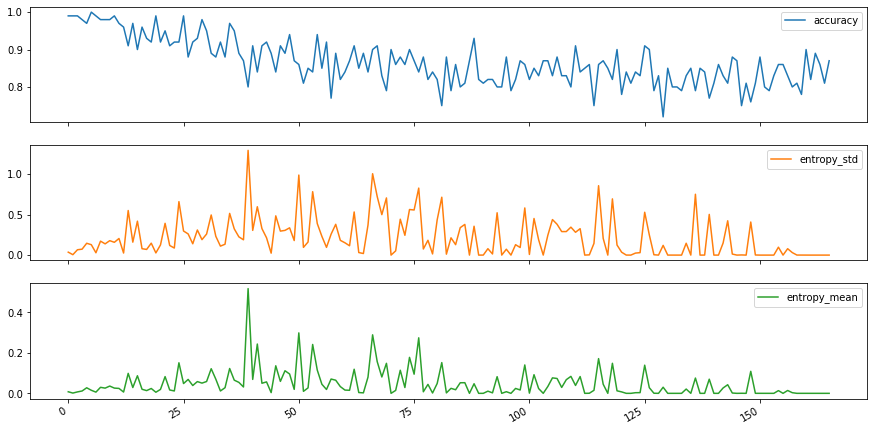

In [147]:
df[['accuracy','entropy_std','entropy_mean']].plot(logy = False, subplots=True, figsize = (15, 8))

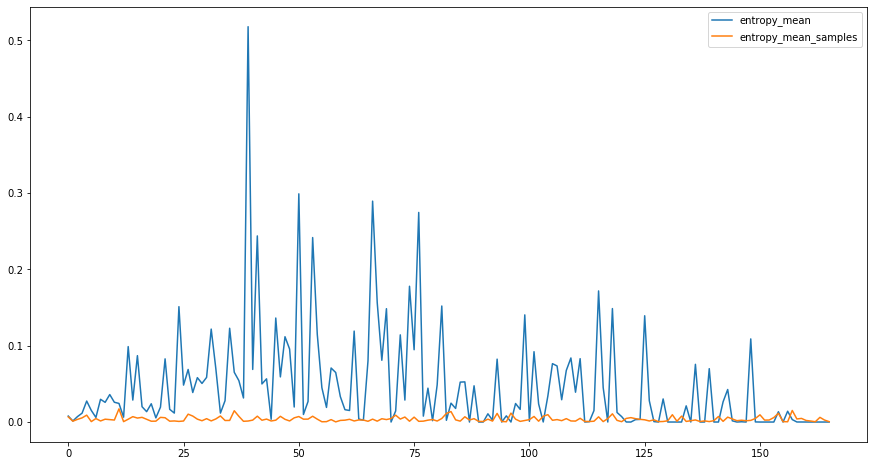

In [146]:
df[['entropy_mean', 'entropy_mean_samples']].plot(logy = False, subplots=False, figsize = (15, 8))

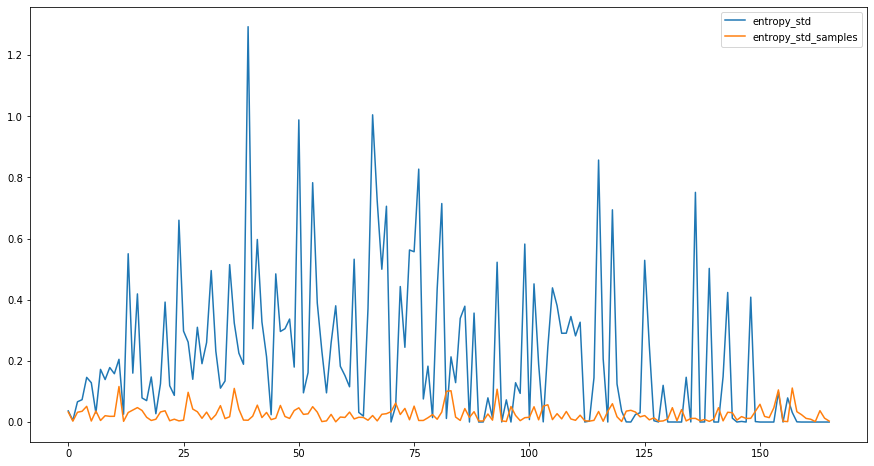

In [151]:
df[['entropy_std', 'entropy_std_samples']].plot(logy = False, subplots=False, figsize = (15, 8))

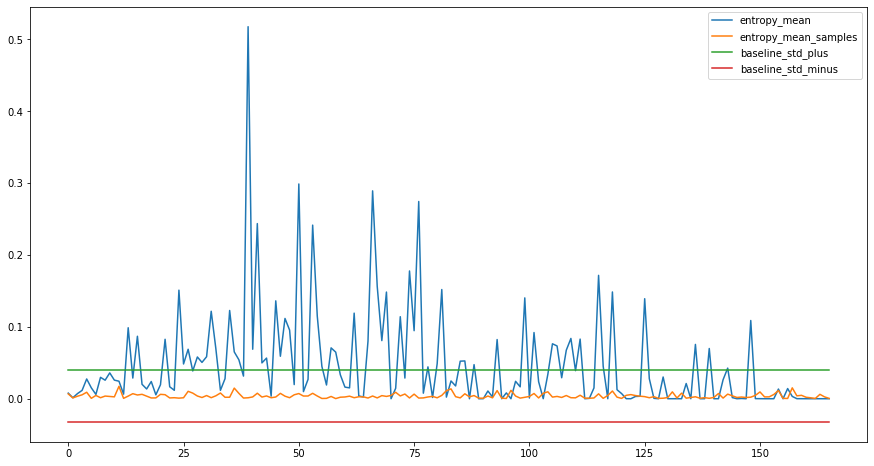

In [152]:
df[['entropy_mean', 'entropy_mean_samples', 'baseline_std_plus', 'baseline_std_minus']].plot(logy = False, subplots=False, figsize = (15, 8))

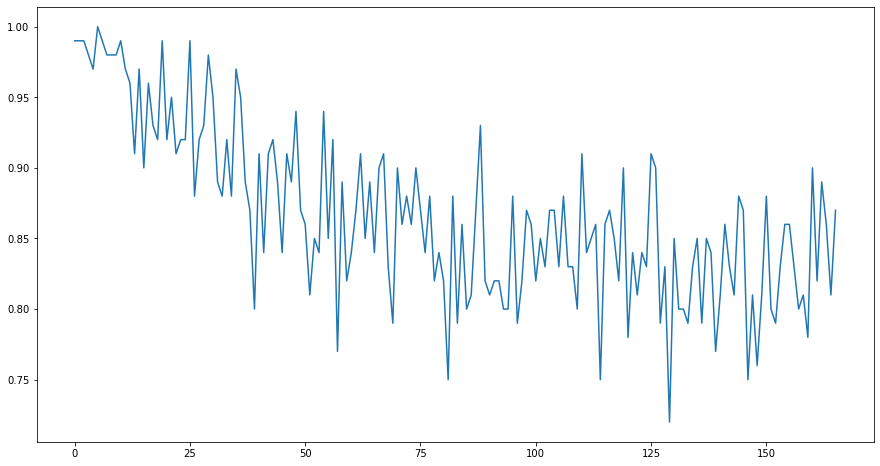

In [153]:
df['accuracy'].plot(logy = False, subplots=False, figsize = (15, 8))